# Individual Lab

<b>First:</b> Rename the file to include your name.

Your individual lab should be turned in by email and should be completely self-contained.  This means that this  should be written in a proper order such that when all programming cells are run sequentially, the desired results occur.  (Test this out before you submit:  Use the Kernel Menu, then choose "Restart and Run All".)

For the next 90 minutes in lab, you should work on the Individual Lab on your own.  You may use any of your resources, you may ask me questions, but you may not ask anyone else.  At the end of the 90 minutes, you will email me your lab.  

Anything not satisfactorily completed in lab, you must both complete them on your own and you will receive a different problem with the same goal next week to complete for full course credit.

At any time during this session, I am willing to give you confirmation if you have completed a given goal.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Question 1
**Summation**

Calculate (and ``print``) the value of the following summation, 
$$ \sum_{j=1}^{20} \sin \left( \frac{j \pi}{20} \right) $$
The value is 12.7 (and $\pi$ is ``np.pi``).  You must use a loop to perform the calculation.

In [2]:
x = 0
for i in range(1,21):
    x = x + np.sin((i * np.pi) / 20)
    
print("summation =", x)

summation = 12.706204736174708


# Question 2
**Plot**

Create a plot of displacement versus time for a damped oscillator with
$$y (t) = A e^{- \gamma t} \cos(\omega t) ,$$
with $A = 2~{\rm mm}$, $\gamma = 0.5~{\rm s}^{-1}$, and $\omega = 1.5~{\rm rad/s}$.  Please note that these units are purely for physical purposes, do not include them when you're trying to create the plot.  Make sure your work includes the following:

- Create a function whose input is ``t`` and whose output is $y(t)$ as described by the equation above.  (Note that ``np.cos()`` and ``np.exp()`` can be useful functions here.)
- Create a plot that includes 250 points between $t = 0$ and $t = 4~{\rm s}$.
- Include axis labels and include the fact that time is measured in seconds and $y$ is measured in mm.


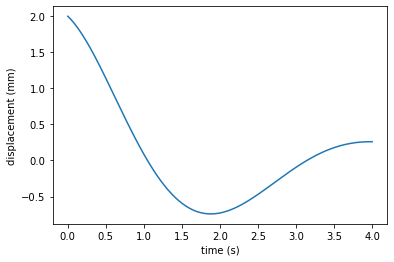

In [3]:
def oscillator(t):
    y = A * np.exp(-gam * t) * np.cos(ome * t)
    return(y)

time = np.linspace(0,4,250)
disp = np.zeros(len(time))

A = 2
gam = 0.5
ome = 1.5

for i in range(len(time)):
    disp[i] = oscillator(time[i])
    
plt.figure()
plt.plot(time, disp)
plt.xlabel("time (s)")
plt.ylabel("displacement (mm)")
plt.show()

# Question 3
**Heat Map**  (see, e.g., Lab 6)

Create a heat map plot of the function
$$ H(x, y) = 5 \exp \left[ - ( \frac{x^2}{4} + \frac{y^2}{9} ) \right]$$
Your work should include the following:

- Create a function that has two inputs, ``x, y``, and whose output is $H(x, y)$ as above.  
- Create 200 points along an x-axis between -3 and 3; and create 400 points along a y-axis between -3 and 3
- Create a matrix and use nested for loops to fill in all the values
- Create a heat map, including a color bar.  Use an appropriate ``extent`` command to include the limits of x and y; and use ``aspect = 1``.

If you did this correctly, the heat map will look like an ellipse that's longer vertically than horizontally.

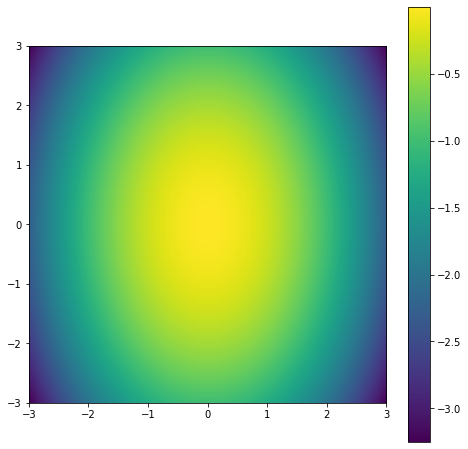

In [4]:
def heat_map(x, y):
    return (-(((x**2)/4) + ((y**2)/9)))

x_axis = np.linspace(-3, 3, 200)
y_axis = np.linspace(-3, 3, 400)

matrix_values = np.zeros((len(y_axis), len(x_axis)))

for i in range(len(y_axis)):
    for j in range(len(x_axis)):
        matrix_values[i,j] = heat_map(x_axis[j], y_axis[i])
        
plt.figure(figsize=(8,8))
plt.imshow(matrix_values, extent=[-3,3,-3,3])
plt.colorbar()
plt.show()

# Question 4
**import a function, plot, and use a slider** (see, e.g., Lab 6)

Make sure you include the file, ``individual.py`` in the same folder as this lab.  The file has a function, ``intensity(y, wavelength)`` whose inputs are a location, y, in mm, and a wavelength in nm and returns the relative intensity created by a double slit apparatus with slits (width a = 0.05 mm) separated by distance, d = 0.25 mm on a screen 3 meters distant.  We want to create a slider to explore the interference pattern created by different wavelengths of light.  We want to:

- ``import`` the functions from this file
- Create a function that takes the wavelength as an input (in nm), then creates a plot between y = -50 mm and +50 mm with enough points to clearly see the pattern, and make it smooth.  (Note y is already in mm, so you want to create the x-axis between -50 and 50, no unit conversion necessary!)
- Create a slider to explore the different interference patterns for wavelengths between 400 and 700 nm (again, from 400 to 700, no unit conversion needed).

In [5]:
import individual as indiv

In [14]:
def interference_plot(wavelength):
    
    y = np.linspace(-50,50, 100)
    intens = np.zeros(len(y))
    
    
    for i in range(len(y)):
        intens[i] = indiv.intensity(y[i], wavelength)
            
    plt.figure()
    plt.plot(y, intens)
    plt.show()

In [15]:
widgets.interact(interference_plot, wavelength=(400,700))

interactive(children=(IntSlider(value=550, description='wavelength', max=700, min=400), Output()), _dom_classe…

<function __main__.interference_plot(wavelength)>

# Question 5
**Error Bar Plot and Best Fit Line** (see, e.g., Lab 7)

Make sure the file, ``ind-data.csv``, is in the same folder as this lab.  The file has three columns, time (in seconds), rms displacement (in mm), and the uncertainty on the rms displacement (in mm).  Create an error bar plot of this data and on the same graph, create a plot of the curve, $s(t) = \sqrt{2t}$, from t = 0 to 10, with enough points to make for a smooth curve.

- ``np.loadtxt()`` the values from the file into three arrays
- create a function that you will use to create the curve $s(t) = \sqrt{2t}$
- create an error bar plot of the data file
- **on the same plot**, include the curve $s(t) = \sqrt{2t}$ which includes times from t = 0 to 10 that is sufficiently smooth
- label the x and y-axes appropriately (including units)

In [16]:
time, rms_disp, uncertainties = np.loadtxt("ind-data.csv",delimiter=',',usecols=(0,1,2),unpack=True)

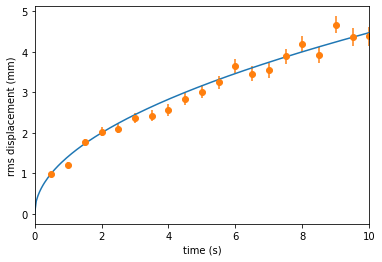

In [17]:
def error(t):
    return(np.sqrt(2*t))

time_sec = np.linspace(0,10,200)
s_curve = np.zeros(len(time_sec))

for i in range(len(time_sec)):
    s_curve[i] = error(time_sec[i])

plt.figure()
plt.plot(time_sec, s_curve)
plt.xlim(-0, 10)
plt.xlabel("time (s)")
plt.ylabel("rms displacement (mm)")
plt.errorbar(time, rms_disp, yerr = uncertainties, fmt = 'o')
plt.show()


# Question 6
**Solve an ODE** (You are strongly encouraged to use your ``time_step()`` function from Lab 10)

The equation of motion for the pendulum is
$$ \frac{d}{dt} \left( \begin{array}{c} \theta \\ \omega \end{array} \right) = \left( \begin{array}{c} \omega \\ - A \sin \theta \end{array} \right) $$
Here let's use $A = 4 \pi^2$ ``= 4 * np.pi**2`` and take the initial conditions $\theta_0 = 0.1$ and $\omega_0 = 0$.  You want to:

- Create a function that takes an array as input, e.g., ``x_in``, and whose output is an array with 2 elements that takes care of the two elements in the derivative, $\omega$ and $- A \sin \theta$.  We can associate our arrays with $\theta$ and $\omega$, e.g., ``theta, omega = x_in`` (just like we did in Lab 10).
- Solve the differential equation using 5000 points between 0 and 5.
- After setting the initial conditions (``theta = 0.1``; ``omega = 0``), you might look to create an array of these values, ``x_array[:] = [theta, omega]``.
- Use the ``time_step()`` function from Lab 10 to solve the differential equation.
- Plot the solution for $\theta$ vs. time.  Label the axes appropriately (the units for $\theta$ are radians and the units for time is seconds).  This should look like a cosine function that undergoes five periods of oscillation.

In [18]:
def pendulum(x_in):
    theta, omega = x_in
    
    derivative = np.zeros(2)
    derivative[:] = [omega, -A*np.sin(theta)]
    return derivative

def time_step(x_in, dt, pendulum):
    k1 = pendulum(x_in) * dt
    k2 = pendulum(x_in + k1) * dt
    
    x_final = x_in + 0.5 * (k1 + k2)
    return x_final

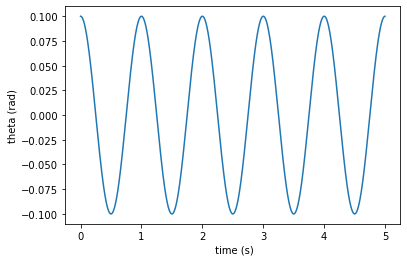

In [19]:
time = np.linspace(0,5,5000)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))

theta = 0.1
omega = 0
A = 4 * np.pi**2

x_array = np.zeros(2)
x_array[:] = [theta, omega]

x_step[0] = x_array[0]
y_step[0] = x_array[1]

for i in range(1, len(time)):
    x_array = time_step(x_array, dt, pendulum)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]
    
plt.figure()
plt.plot(time, x_step)
plt.xlabel(" time (s)")
plt.ylabel("theta (rad)")
plt.show()

# Question 7
**Sliders and ODE solving** (see, e.g., Lab 10)

We are going to do the same thing as Question 6, but now we wish to have different initial conditions.  Create **a slider** that allows you to change the initial conditions from $\theta_0 = 0.1$ to 1 and graphs the solution.  You should notice that as you increase $\theta_0$, not only does the amplitude increase, but the period increases as well.

In [27]:
def pendulum1(x_in, theta):
    theta, omega = x_in
    
    derivative = np.zeros(2)
    derivative[:] = [omega, -A*np.sin(theta)]
    return derivative

def time_step_b(x_in, dt, pendulum, theta):
    k1 = pendulum1(x_in, theta) * dt
    k2 = pendulum1(x_in + k1, theta) * dt
    x_final = x_in + 0.5 * (k1 + k2)
    return x_final

def pendulum_plot(theta):
    time = np.linspace(0, 5, 500)
    dt = time[1] - time[0]
    x_step = np.zeros(len(time))
    y_step = np.zeros(len(time))

    omega = 0
    A = 4 * np.pi**2

    x_array = np.zeros(2)
    x_array [:] = [theta, omega]

    x_step[0] = x_array[0]
    y_step[0] = x_array[1]

    for i in range(1, len(time)):
        x_array = time_step_b(x_array, dt, pendulum, theta)
        x_step[i] = x_array[0]
        y_step[i] = x_array[1]
        
    plt.figure()
    plt.plot(time, x_step, color = "lightskyblue")
    plt.show()


In [28]:
widgets.interact(pendulum_plot, theta=(0.1,1))

interactive(children=(FloatSlider(value=0.55, description='theta', max=1.0, min=0.1), Output()), _dom_classes=…

<function __main__.pendulum_plot(theta)>